In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats
from pathlib import Path
import pickle
import numpy as np

In [2]:
# display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 70)

In [3]:
cd tmp

/home/team9/tmp


In [4]:
ls

data/


In [5]:
cd data

/home/team9/tmp/data


In [6]:
ls

Custom_location_53_345035_-6_267261_62b5c8e6c91d98000ba01ceb.csv
rt_leavetimes_DB_2018.txt
rt_trips_DB_2018.txt
rt_vehicles_DB_2018.txt
rt_vehicles_DB_2018.zip
trips_modelling.csv
weather_factorised.csv
weather_trips.csv


In [7]:
trips_modelling = pd.read_csv('trips_modelling.csv', sep=",")

In [8]:
trips_modelling

,Unnamed: 0,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error
0,0,2018-02-07,6253783,87245,84600,87524,84600,NaN,2,23,2924.0,6.39,9999.0,7.2,Drizzle,light intensity drizzle,09n,68_1,2645,279.0
1,1,2018-02-07,6254942,35512,32100,36329,32082,NaN,2,8,4247.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,45A_2,3412,835.0
2,2,2018-02-07,6259460,57261,54420,58463,54443,NaN,2,15,4020.0,4.39,9999.0,5.1,Drizzle,light intensity drizzle,09d,25A_1,2841,1179.0
3,3,2018-02-07,6248240,41648,37200,42019,37538,NaN,2,10,4481.0,0.39,9999.0,5.7,Clouds,broken clouds,04d,77A_2,4448,33.0
4,4,2018-02-07,6251760,34768,28920,35709,28929,NaN,2,8,6780.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,39_2,5848,932.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788429,1810482,2018-05-14,6765652,30626,29100,30482,29119,NaN,0,8,1363.0,12.39,9999.0,3.6,Clouds,broken clouds,04d,53_2,1526,-163.0
1788430,1810483,2018-05-14,6765662,65950,64800,66270,64815,NaN,0,18,1455.0,16.46,9999.0,0.5,Clouds,broken clouds,04d,53_2,1150,305.0
1788431,1810484,2018-05-14,6765828,28647,25800,28688,25858,NaN,0,7,2830.0,11.39,9999.0,2.6,Clouds,broken clouds,04d,45A_1,2847,-17.0
1788432,1810485,2018-05-14,6765849,61560,57840,61365,57859,NaN,0,16,3506.0,15.46,9999.0,2.6,Clouds,broken clouds,04d,123_2,3720,-214.0


In [9]:
trips_modelling.dtypes

Unnamed: 0                int64
DAYOFSERVICE             object
TRIPID                    int64
PLANNEDTIME_ARR           int64
PLANNEDTIME_DEP           int64
ACTUALTIME_ARR            int64
ACTUALTIME_DEP            int64
SUPPRESSED              float64
DAYOFWEEK                 int64
HOUR_DEPARTURE            int64
JOURNEY_TIME            float64
temp                    float64
visibility              float64
wind_speed              float64
weather_main             object
weather_description      object
weather_icon             object
LINE_DIRECTION           object
planned_journey_time      int64
error                   float64
dtype: object

In [10]:
# trips_modelling[trips_modelling['DAYOFWEEK']==0]

In [11]:
# trips_modelling[trips_modelling['HOUR_DEPARTURE']==4]

In [12]:
trips_modelling["DAYOFSERVICE"] =  trips_modelling["DAYOFSERVICE"].astype("datetime64[ns]") 
trips_modelling = trips_modelling.drop(columns=["Unnamed: 0"])
trips_modelling['DAYOFWEEK'] = trips_modelling['DAYOFWEEK'].astype('category')
trips_modelling['LINE_DIRECTION'] = trips_modelling['LINE_DIRECTION'].astype('category')
trips_modelling["HOUR_DEPARTURE"] =  trips_modelling["HOUR_DEPARTURE"].astype("category")
trips_modelling["weather_main"] =  trips_modelling["weather_main"].astype("category")

In [13]:
trips_modelling.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                     category
HOUR_DEPARTURE                category
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                  category
weather_description             object
weather_icon                    object
LINE_DIRECTION                category
planned_journey_time             int64
error                          float64
dtype: object

### add rush hour

In [14]:
def cal_rush(df):
    df['rush_hour'] = 0
    rush_hour = [7,8,9,16,17,18,19]
    weekends = [5,6]
    for i in rush_hour:
        df['rush_hour'].loc[df['HOUR_DEPARTURE'] == i] = 1
    
    for j in weekends:
        df['rush_hour'].loc[df['DAYOFWEEK'] == j] = 0

In [15]:
trips_modelling['rush_hour'] = 0

In [16]:
rush_hour = [7,8,9,16,17,18,19]
for i in rush_hour:
    trips_modelling['rush_hour'].loc[trips_modelling['HOUR_DEPARTURE'] == i] = 1

/tmp/ipykernel_8379/2884737302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_modelling['rush_hour'].loc[trips_modelling['HOUR_DEPARTURE'] == i] = 1


In [17]:
weekends = [5,6]
for j in weekends:
    trips_modelling['rush_hour'].loc[trips_modelling['DAYOFWEEK'] == j] = 0

/tmp/ipykernel_8379/3958362292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_modelling['rush_hour'].loc[trips_modelling['DAYOFWEEK'] == j] = 0


### encode hours

drop_first should be set as false, or it might delete the first hour/weekday/month 

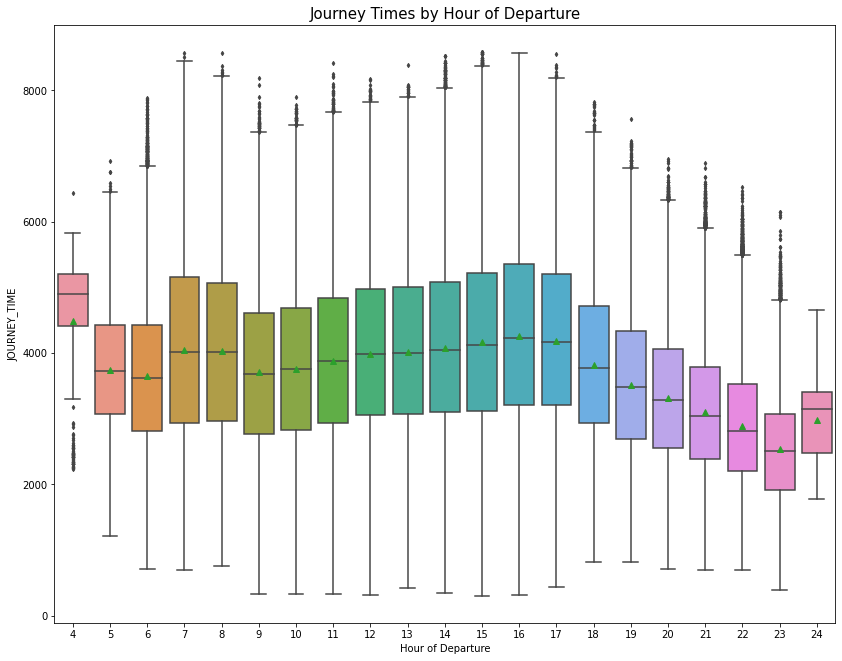

In [18]:
fig, ax = plt.subplots(figsize=(14,11))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = trips_modelling['HOUR_DEPARTURE'], y=trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True)
plt.xlabel('Hour of Departure')

plt.title('Journey Times by Hour of Departure')
plt.show()

In [19]:
hourDummies = pd.get_dummies(trips_modelling['HOUR_DEPARTURE'], prefix='HOUR_DEPARTURE', drop_first=False)
trips_modelling = pd.concat([trips_modelling, hourDummies], axis=1)

### encode weekdays

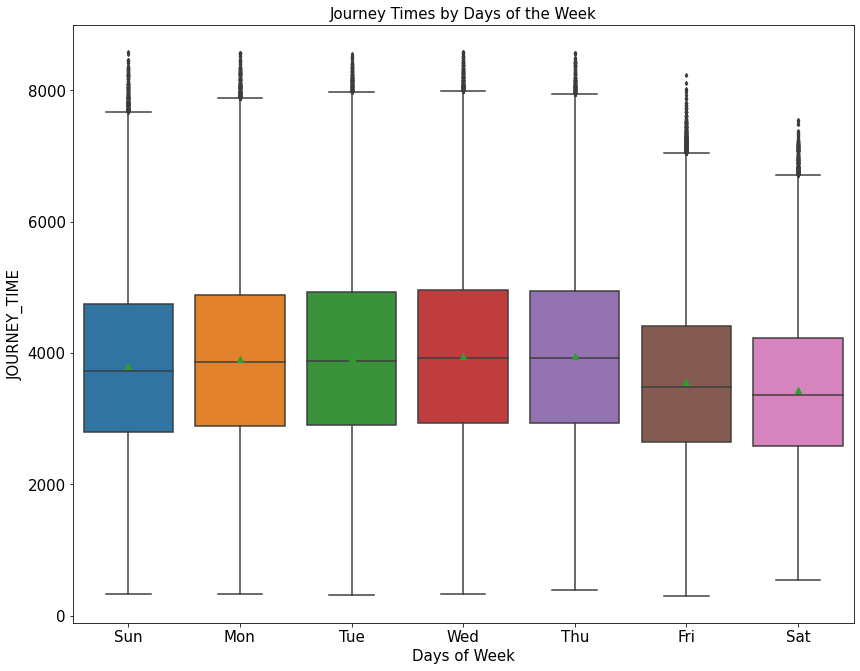

In [20]:
labels =["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]


fig, ax = plt.subplots(figsize=(14,11))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = trips_modelling['DAYOFWEEK'], y=trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True)
ax.set_xticklabels(labels)
plt.xlabel('Days of Week')

plt.title('Journey Times by Days of the Week')
plt.show()

Clearly the day of the week has an impact, although it is not ordinal. I will use get_dummies to encode them.

In [21]:
dayDummies = pd.get_dummies(trips_modelling['DAYOFWEEK'], prefix='DAYOFWEEK', drop_first=False)
trips_modelling = pd.concat([trips_modelling, dayDummies], axis=1)

### encode months

In [22]:
trips_modelling['MONTH'] = trips_modelling['DAYOFSERVICE'].dt.month
trips_modelling["MONTH"] =  trips_modelling["MONTH"].astype("category")

In [23]:
trips_modelling

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error,rush_hour,HOUR_DEPARTURE_4,HOUR_DEPARTURE_5,HOUR_DEPARTURE_6,HOUR_DEPARTURE_7,HOUR_DEPARTURE_8,HOUR_DEPARTURE_9,HOUR_DEPARTURE_10,HOUR_DEPARTURE_11,HOUR_DEPARTURE_12,HOUR_DEPARTURE_13,HOUR_DEPARTURE_14,HOUR_DEPARTURE_15,HOUR_DEPARTURE_16,HOUR_DEPARTURE_17,HOUR_DEPARTURE_18,HOUR_DEPARTURE_19,HOUR_DEPARTURE_20,HOUR_DEPARTURE_21,HOUR_DEPARTURE_22,HOUR_DEPARTURE_23,HOUR_DEPARTURE_24,DAYOFWEEK_0,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5,DAYOFWEEK_6,MONTH
0,2018-02-07,6253783,87245,84600,87524,84600,NaN,2,23,2924.0,6.39,9999.0,7.2,Drizzle,light intensity drizzle,09n,68_1,2645,279.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2
1,2018-02-07,6254942,35512,32100,36329,32082,NaN,2,8,4247.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,45A_2,3412,835.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
2,2018-02-07,6259460,57261,54420,58463,54443,NaN,2,15,4020.0,4.39,9999.0,5.1,Drizzle,light intensity drizzle,09d,25A_1,2841,1179.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
3,2018-02-07,6248240,41648,37200,42019,37538,NaN,2,10,4481.0,0.39,9999.0,5.7,Clouds,broken clouds,04d,77A_2,4448,33.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
4,2018-02-07,6251760,34768,28920,35709,28929,NaN,2,8,6780.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,39_2,5848,932.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788429,2018-05-14,6765652,30626,29100,30482,29119,NaN,0,8,1363.0,12.39,9999.0,3.6,Clouds,broken clouds,04d,53_2,1526,-163.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
1788430,2018-05-14,6765662,65950,64800,66270,64815,NaN,0,18,1455.0,16.46,9999.0,0.5,Clouds,broken clouds,04d,53_2,1150,305.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5
1788431,2018-05-14,6765828,28647,25800,28688,25858,NaN,0,7,2830.0,11.39,9999.0,2.6,Clouds,broken clouds,04d,45A_1,2847,-17.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
1788432,2018-05-14,6765849,61560,57840,61365,57859,NaN,0,16,3506.0,15.46,9999.0,2.6,Clouds,broken clouds,04d,123_2,3720,-214.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5


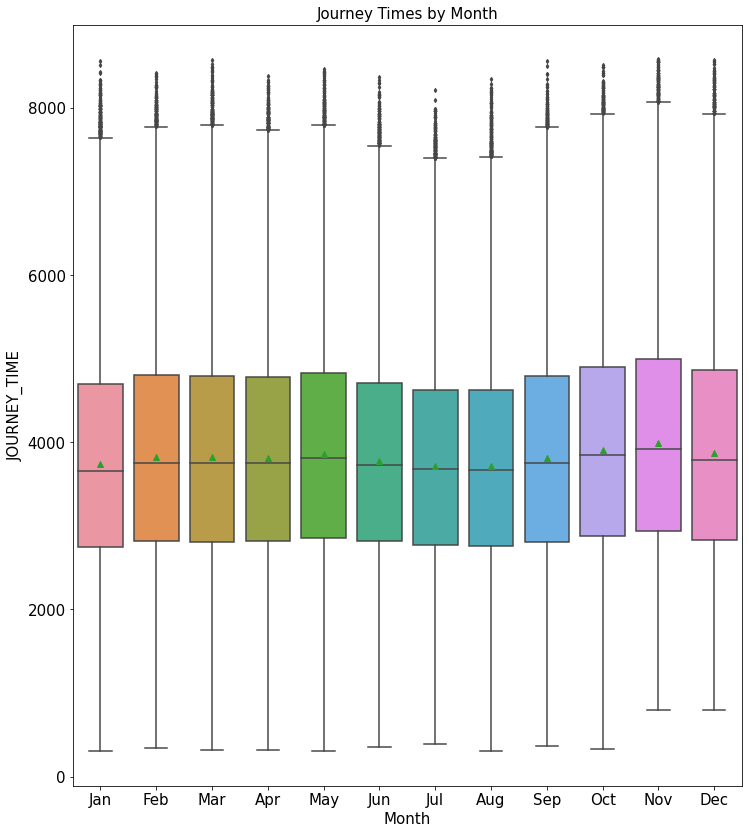

In [24]:
labels =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


fig, ax = plt.subplots(figsize=(12,14))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = trips_modelling['MONTH'], y=trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True)
ax.set_xticklabels(labels)
plt.xlabel('Month')

plt.title('Journey Times by Month')
plt.show()

In [25]:
monthDummies = pd.get_dummies(trips_modelling['MONTH'], prefix='MONTH', drop_first=False)
trips_modelling = pd.concat([trips_modelling, monthDummies], axis=1)

### encode weather

In [26]:
trips_modelling['weather_main'].unique()

['Drizzle', 'Clouds', 'Rain', 'Mist', 'Fog', 'Clear', 'Snow', 'Smoke', 'Thunderstorm']
Categories (9, object): ['Clear', 'Clouds', 'Drizzle', 'Fog', ..., 'Rain', 'Smoke', 'Snow', 'Thunderstorm']

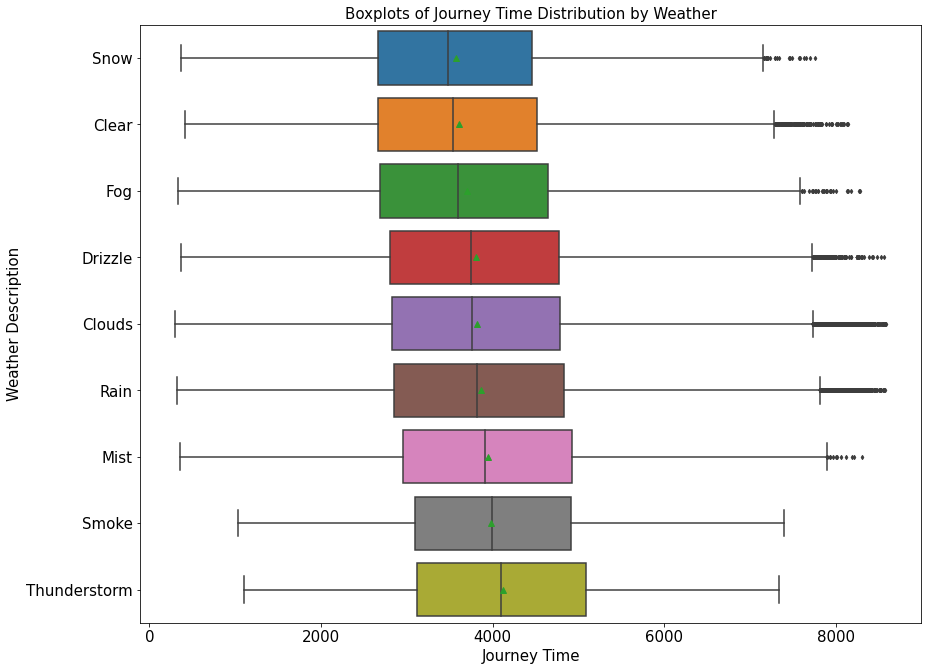

In [27]:
fig, ax = plt.subplots(figsize=(14,11))
means = trips_modelling['JOURNEY_TIME'].groupby(trips_modelling["weather_main"]).mean().sort_values().index
sns.boxplot(y=trips_modelling['weather_main'], x = trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True, order=means)
plt.xlabel('Journey Time')
plt.ylabel('Weather Description')
plt.title('Boxplots of Journey Time Distribution by Weather')
plt.show()

In [28]:
trips_modelling['weather_main'].value_counts(dropna=False)

Clouds          1162283
Rain             357381
Drizzle          127276
Clear             86685
Mist              24469
Fog               17309
Snow              12323
Thunderstorm        362
Smoke               346
Name: weather_main, dtype: int64

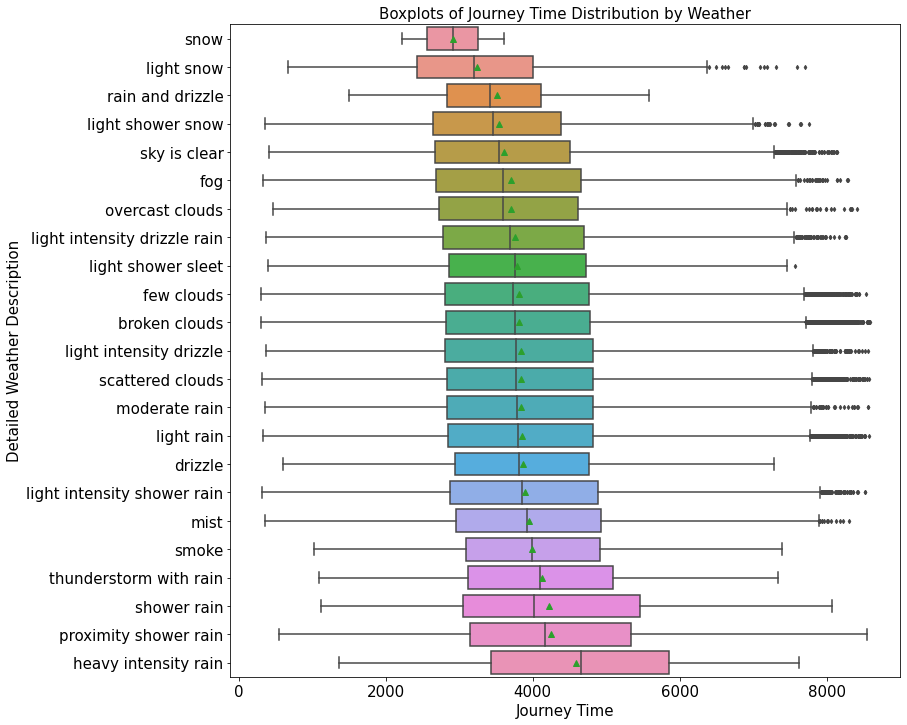

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
means = trips_modelling['JOURNEY_TIME'].groupby(trips_modelling["weather_description"]).mean().sort_values().index
sns.boxplot(y=trips_modelling['weather_description'], x = trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True, order=means)
plt.xlabel('Journey Time')
plt.ylabel('Detailed Weather Description')
plt.title('Boxplots of Journey Time Distribution by Weather')
plt.show()

In [30]:
trips_modelling['weather_description'].value_counts(dropna=False)

broken clouds                   689203
light rain                      250795
scattered clouds                241448
few clouds                      224716
sky is clear                     86685
light intensity drizzle          81016
light intensity shower rain      74514
light intensity drizzle rain     44243
moderate rain                    28293
mist                             24469
fog                              17309
light shower snow                 7351
overcast clouds                   6916
light shower sleet                3441
proximity shower rain             2973
drizzle                           1989
light snow                        1529
heavy intensity rain               408
shower rain                        398
thunderstorm with rain             362
smoke                              346
rain and drizzle                    28
snow                                 2
Name: weather_description, dtype: int64

With minimal value counts for those categories that impact journey time the most, it seems modelling these will be largely insiginificant. That being said, those involving rain do seem to have some impact, and this intuitively makes sense.

- In addition, we can to a certain extent see a more discernible trend in the individual routes than the entire dataset (see below)

I will continue by encoding those journeys occuring during rain with a 1, and 0 otherwise.

In [31]:
trips_modelling

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error,rush_hour,HOUR_DEPARTURE_4,HOUR_DEPARTURE_5,HOUR_DEPARTURE_6,HOUR_DEPARTURE_7,HOUR_DEPARTURE_8,HOUR_DEPARTURE_9,HOUR_DEPARTURE_10,HOUR_DEPARTURE_11,HOUR_DEPARTURE_12,HOUR_DEPARTURE_13,HOUR_DEPARTURE_14,HOUR_DEPARTURE_15,HOUR_DEPARTURE_16,HOUR_DEPARTURE_17,HOUR_DEPARTURE_18,HOUR_DEPARTURE_19,HOUR_DEPARTURE_20,HOUR_DEPARTURE_21,HOUR_DEPARTURE_22,HOUR_DEPARTURE_23,HOUR_DEPARTURE_24,DAYOFWEEK_0,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5,DAYOFWEEK_6,MONTH,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2018-02-07,6253783,87245,84600,87524,84600,NaN,2,23,2924.0,6.39,9999.0,7.2,Drizzle,light intensity drizzle,09n,68_1,2645,279.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0
1,2018-02-07,6254942,35512,32100,36329,32082,NaN,2,8,4247.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,45A_2,3412,835.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0
2,2018-02-07,6259460,57261,54420,58463,54443,NaN,2,15,4020.0,4.39,9999.0,5.1,Drizzle,light intensity drizzle,09d,25A_1,2841,1179.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0
3,2018-02-07,6248240,41648,37200,42019,37538,NaN,2,10,4481.0,0.39,9999.0,5.7,Clouds,broken clouds,04d,77A_2,4448,33.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0
4,2018-02-07,6251760,34768,28920,35709,28929,NaN,2,8,6780.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,39_2,5848,932.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788429,2018-05-14,6765652,30626,29100,30482,29119,NaN,0,8,1363.0,12.39,9999.0,3.6,Clouds,broken clouds,04d,53_2,1526,-163.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0
1788430,2018-05-14,6765662,65950,64800,66270,64815,NaN,0,18,1455.0,16.46,9999.0,0.5,Clouds,broken clouds,04d,53_2,1150,305.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0
1788431,2018-05-14,6765828,28647,25800,28688,25858,NaN,0,7,2830.0,11.39,9999.0,2.6,Clouds,broken clouds,04d,45A_1,2847,-17.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0
1788432,2018-05-14,6765849,61560,57840,61365,57859,NaN,0,16,3506.0,15.46,9999.0,2.6,Clouds,broken clouds,04d,123_2,3720,-214.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
trips_modelling['weather_main'] = trips_modelling['weather_main'].apply(lambda x: 1 if (x == "Rain" or x == "Mist" or x == "Thunderstorm") else 0)

In [33]:
# calculate correlation coefficient
r, p = stats.pearsonr(trips_modelling['weather_main'], trips_modelling['JOURNEY_TIME'])
print('Pearson\'s correlation r is %s with a p-value = %s' %(r,p))

Pearson's correlation r is 0.020311769516159373 with a p-value = 1.6302925131961625e-162


In [34]:
trips_modelling['weather_main'].value_counts(dropna=False)

0    1406222
1     382212
Name: weather_main, dtype: int64

In [35]:
trips_modelling.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                     category
HOUR_DEPARTURE                category
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                     int64
weather_description             object
weather_icon                    object
LINE_DIRECTION                category
planned_journey_time             int64
error                          float64
rush_hour                        int64
HOUR_DEPARTURE_4                 uint8
HOUR_DEPARTURE_5                 uint8
HOUR_DEPARTURE_6                 uint8
HOUR_DEPARTURE_7                 uint8
HOUR_DEPARTURE_8                 uint8
HOUR_DEPARTURE_9         

## Select input features for the models

In [36]:
trips_modelling = trips_modelling.drop({'DAYOFSERVICE', "TRIPID", "PLANNEDTIME_ARR", "PLANNEDTIME_DEP", "ACTUALTIME_ARR","ACTUALTIME_DEP", "SUPPRESSED", "DAYOFWEEK", "HOUR_DEPARTURE", "visibility", "wind_speed", "weather_description", "weather_icon", "error", "MONTH",'planned_journey_time'}, axis=1)

In [37]:
# convert to categories
categories = [feature for feature in list(trips_modelling.columns) if feature != 'JOURNEY_TIME' and feature != 'LINE_DIRECTION' and feature != 'rush_hour' and feature != 'temp']
for feature in categories:
    trips_modelling[feature] = trips_modelling[feature].astype('category')

In [38]:
categories

['weather_main',
 'HOUR_DEPARTURE_4',
 'HOUR_DEPARTURE_5',
 'HOUR_DEPARTURE_6',
 'HOUR_DEPARTURE_7',
 'HOUR_DEPARTURE_8',
 'HOUR_DEPARTURE_9',
 'HOUR_DEPARTURE_10',
 'HOUR_DEPARTURE_11',
 'HOUR_DEPARTURE_12',
 'HOUR_DEPARTURE_13',
 'HOUR_DEPARTURE_14',
 'HOUR_DEPARTURE_15',
 'HOUR_DEPARTURE_16',
 'HOUR_DEPARTURE_17',
 'HOUR_DEPARTURE_18',
 'HOUR_DEPARTURE_19',
 'HOUR_DEPARTURE_20',
 'HOUR_DEPARTURE_21',
 'HOUR_DEPARTURE_22',
 'HOUR_DEPARTURE_23',
 'HOUR_DEPARTURE_24',
 'DAYOFWEEK_0',
 'DAYOFWEEK_1',
 'DAYOFWEEK_2',
 'DAYOFWEEK_3',
 'DAYOFWEEK_4',
 'DAYOFWEEK_5',
 'DAYOFWEEK_6',
 'MONTH_1',
 'MONTH_2',
 'MONTH_3',
 'MONTH_4',
 'MONTH_5',
 'MONTH_6',
 'MONTH_7',
 'MONTH_8',
 'MONTH_9',
 'MONTH_10',
 'MONTH_11',
 'MONTH_12']

In [39]:
trips_modelling.dtypes

JOURNEY_TIME          float64
temp                  float64
weather_main         category
LINE_DIRECTION       category
rush_hour               int64
HOUR_DEPARTURE_4     category
HOUR_DEPARTURE_5     category
HOUR_DEPARTURE_6     category
HOUR_DEPARTURE_7     category
HOUR_DEPARTURE_8     category
HOUR_DEPARTURE_9     category
HOUR_DEPARTURE_10    category
HOUR_DEPARTURE_11    category
HOUR_DEPARTURE_12    category
HOUR_DEPARTURE_13    category
HOUR_DEPARTURE_14    category
HOUR_DEPARTURE_15    category
HOUR_DEPARTURE_16    category
HOUR_DEPARTURE_17    category
HOUR_DEPARTURE_18    category
HOUR_DEPARTURE_19    category
HOUR_DEPARTURE_20    category
HOUR_DEPARTURE_21    category
HOUR_DEPARTURE_22    category
HOUR_DEPARTURE_23    category
HOUR_DEPARTURE_24    category
DAYOFWEEK_0          category
DAYOFWEEK_1          category
DAYOFWEEK_2          category
DAYOFWEEK_3          category
DAYOFWEEK_4          category
DAYOFWEEK_5          category
DAYOFWEEK_6          category
MONTH_1   

### calculate average loss functions for all routes

In [40]:
trips_modelling[trips_modelling.isnull().T.any()]

,JOURNEY_TIME,temp,weather_main,LINE_DIRECTION,rush_hour,HOUR_DEPARTURE_4,HOUR_DEPARTURE_5,HOUR_DEPARTURE_6,HOUR_DEPARTURE_7,HOUR_DEPARTURE_8,HOUR_DEPARTURE_9,HOUR_DEPARTURE_10,HOUR_DEPARTURE_11,HOUR_DEPARTURE_12,HOUR_DEPARTURE_13,HOUR_DEPARTURE_14,HOUR_DEPARTURE_15,HOUR_DEPARTURE_16,HOUR_DEPARTURE_17,HOUR_DEPARTURE_18,HOUR_DEPARTURE_19,HOUR_DEPARTURE_20,HOUR_DEPARTURE_21,HOUR_DEPARTURE_22,HOUR_DEPARTURE_23,HOUR_DEPARTURE_24,DAYOFWEEK_0,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5,DAYOFWEEK_6,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12


In [41]:
trips_modelling.LINE_DIRECTION.unique()

['68_1', '45A_2', '25A_1', '77A_2', '39_2', ..., '161_1', '16D_1', '33E_1', '41D_1', '41D_2']
Length: 252
Categories (252, object): ['102_1', '102_2', '104_1', '104_2', ..., '84_1', '84_2', '9_1', '9_2']

In [42]:
def modelEvalucation(actualVal, predictions):
    #classification evaluation measures
    print("MAE: ", metrics.mean_absolute_error(actualVal, predictions))
    print("MSE: ", metrics.mean_squared_error(actualVal, predictions))
    print("MAPE:", metrics.mean_absolute_percentage_error(actualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(actualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(actualVal, predictions))
    print("\n")

In [43]:
line=trips_modelling.LINE_DIRECTION.unique()
print(line)

['68_1', '45A_2', '25A_1', '77A_2', '39_2', ..., '161_1', '16D_1', '33E_1', '41D_1', '41D_2']
Length: 252
Categories (252, object): ['102_1', '102_2', '104_1', '104_2', ..., '84_1', '84_2', '9_1', '9_2']


In [44]:
MAPEs = []
R2 = []
X_train_size_avg = 0
X_test_size_avg = 0
for i in line:
    dt=trips_modelling[trips_modelling.LINE_DIRECTION ==i]
    dt=dt.drop('LINE_DIRECTION', axis=1)
    y=dt["JOURNEY_TIME"] 
    x=dt.drop('JOURNEY_TIME', axis=1)
    features=x.columns.values.tolist()
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
    rfc = RandomForestRegressor(n_estimators=50, max_features='auto', random_state=90)
    rfc.fit(X_train, y_train)
     
    #add to avg size of train/test arrays
    X_train_size_avg += X_train.shape[0]/len(line)
    X_test_size_avg += X_test.shape[0]/len(line)
    prediction = rfc.predict(X_test)
    #modelEvalucation(y_test, prediction)
    MAPEs += [metrics.mean_absolute_percentage_error(y_test, prediction)]
    R2 += [metrics.r2_score(y_test, prediction)]


/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/team9/miniconda3/envs/comp47360py39/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

In [45]:
print('Avgerage train/test size: %.0f/%.0f'%(X_train_size_avg,X_test_size_avg))
print("The minimum MAPE of all predition models is: %f" %min(MAPEs))
print("The maximum MAPE of all predition models is: %f" %max(MAPEs))
print("The minimum R2 of all predition models is: %f" %min(R2))
print("The maximum R2 of all predition models is: %f" %max(R2))

Avgerage train/test size: 5677/1420
The minimum MAPE of all predition models is: 0.012939
The maximum MAPE of all predition models is: 0.423975
The minimum R2 of all predition models is: -3.712700
The maximum R2 of all predition models is: 0.985562


In [46]:
print(np.mean(MAPEs))

0.09765743551385875


In [47]:
print(np.mean(R2))

nan


## Compare

### dummy with month,weekday,hour,rushhour and without planned
Avgerage train/test size: 4967/2130
The minimum MAPE of all predition models is: 0.046572  
The maximum MAPE of all predition models is: 0.448457  
The minimum R2 of all predition models is: -4.633822  
The maximum R2 of all predition models is: 0.988479  
mean mape: 0.09755728639760285     
mean r2: 0.34881921051932613  
### dummy with  weekday,hour,rushhour and without planned
**better not remove**  
Avgerage train/test size: 4967/2130  
The minimum MAPE of all predition models is: 0.050120   
The maximum MAPE of all predition models is: 0.433290  
The minimum R2 of all predition models is: -4.562664  
The maximum R2 of all predition models is: 0.983308  
mean mape: 0.10138234166499689     
mean r2: 0.29589238669313395 

## save pickle files

In [48]:
# for i in line:
#     dt=trips_modelling[trips_modelling.LINE_DIRECTION ==i]
#     dt=dt.drop('LINE_DIRECTION', axis=1)
#     y=dt["JOURNEY_TIME"] 
#     x=dt.drop('JOURNEY_TIME', axis=1)
#     features=x.columns.values.tolist()
#     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
#     rfc = RandomForestRegressor(n_estimators=50, max_features='auto', random_state=90)
#     rfc.fit(X_train, y_train)
#     #save model
#     t=i+'.pickle'
#     f = open(t,'wb')
#     pickle.dump(rfc,f)
#     f.close()

### try to open pickle

In [49]:
cd ~

/home/team9


In [50]:
cd pickle/dummy_withoutplanned

/home/team9/pickle/dummy_withoutplanned


In [51]:
# pickle testing
f = open('111_1.pickle', 'rb')
model = pickle.load(f)
print(model)

RandomForestRegressor(max_features='auto', n_estimators=50, random_state=90)


In [52]:
data = {
        'temp':  6,
        'weather_main': 0,
'rush_hour': 1,  
'HOUR_DEPARTURE_4': 0,   
'HOUR_DEPARTURE_5': 0,
'HOUR_DEPARTURE_6':0,
'HOUR_DEPARTURE_7':0,
'HOUR_DEPARTURE_8':0,
'HOUR_DEPARTURE_9':0,
'HOUR_DEPARTURE_10':0,
'HOUR_DEPARTURE_11':1, 
'HOUR_DEPARTURE_12':0,  
'HOUR_DEPARTURE_13':0,  
'HOUR_DEPARTURE_14':0, 
'HOUR_DEPARTURE_15':0,   
'HOUR_DEPARTURE_16':0, 
'HOUR_DEPARTURE_17':0, 
'HOUR_DEPARTURE_18':0,  
'HOUR_DEPARTURE_19':0,   
'HOUR_DEPARTURE_20':0,  
'HOUR_DEPARTURE_21':0,  
'HOUR_DEPARTURE_22':0, 
'HOUR_DEPARTURE_23':0, 
'HOUR_DEPARTURE_24':0,   
'DAYOFWEEK_0':0,  
'DAYOFWEEK_1':0,  
'DAYOFWEEK_2':0, 
'DAYOFWEEK_3':1, 
'DAYOFWEEK_4':0, 
'DAYOFWEEK_5':0,  
'DAYOFWEEK_6':0, 
'MONTH_1':0,  
'MONTH_2':0,  
'MONTH_3':0,  
'MONTH_4':1, 
'MONTH_5':0,
'MONTH_6':0, 
'MONTH_7':0, 
'MONTH_8':0,  
'MONTH_9':0, 
'MONTH_10':0, 
'MONTH_11':0,
'MONTH_12':0,
       }
df = pd.DataFrame([data])

In [53]:
print(df)

   temp  weather_main  rush_hour  HOUR_DEPARTURE_4  HOUR_DEPARTURE_5  \
0     6             0          1                 0                 0   

   HOUR_DEPARTURE_6  HOUR_DEPARTURE_7  HOUR_DEPARTURE_8  HOUR_DEPARTURE_9  \
0                 0                 0                 0                 0   

   HOUR_DEPARTURE_10  HOUR_DEPARTURE_11  HOUR_DEPARTURE_12  HOUR_DEPARTURE_13  \
0                  0                  1                  0                  0   

   HOUR_DEPARTURE_14  HOUR_DEPARTURE_15  HOUR_DEPARTURE_16  HOUR_DEPARTURE_17  \
0                  0                  0                  0                  0   

   HOUR_DEPARTURE_18  HOUR_DEPARTURE_19  HOUR_DEPARTURE_20  HOUR_DEPARTURE_21  \
0                  0                  0                  0                  0   

   HOUR_DEPARTURE_22  HOUR_DEPARTURE_23  HOUR_DEPARTURE_24  DAYOFWEEK_0  \
0                  0                  0                  0            0   

   DAYOFWEEK_1  DAYOFWEEK_2  DAYOFWEEK_3  DAYOFWEEK_4  DAYOF

In [54]:
y = model.predict(df)

In [55]:
print(y)

[2763.99]
